In [19]:
import sys
import numpy as np
from collections import Counter
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matploltib inline

sys.path.append('../pygkernels')
from pygkernels.data import Datasets

UsageError: Line magic function `%matploltib` not found.


In [45]:
def power_law(values):
    values_count = sorted(Counter(values).items(), key=lambda x: x[0], reverse=True)
    deg, cnt = zip(*values_count)
    cnt = np.cumsum(cnt)
    params, _ = curve_fit(lambda x, a, b: x * a + b, np.log(deg), np.log(cnt))
    return -1 * params[0] + 1

In [63]:
# values = [100, 100, 100, 100, 101]
values = [10, 10, 30, 50, 1000]
values_count = sorted(Counter(values).items(), key=lambda x: x[0], reverse=True)
deg, cnt = zip(*values_count)
cnt = np.cumsum(cnt)
params, _ = curve_fit(lambda x, a, b: x * a + b, np.log(deg), np.log(cnt))
tau = -1 * params[0] + 1

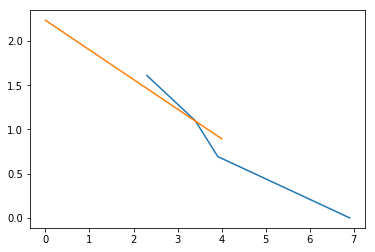

In [64]:
plt.plot(np.log(deg), np.log(cnt))
plt.plot(range(5), [params[0] * i + params[1] for i in range(5)])

In [69]:
tau

1.3348709742974154

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


TypeError: unhashable type: 'list'

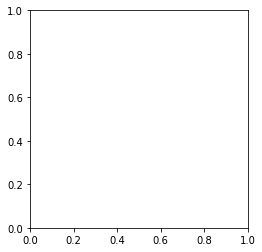

In [53]:
plt.imshow(range(5), [x**(-tau) for x in range(5)])

In [54]:
[x**(-tau) for x in range(5)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


[inf,
 1.0,
 1.019103786407515e-49,
 2.2380168115641617e-78,
 1.0385725274701339e-98]

In [65]:
!pip3 install powerlaw

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for powerlaw: filename=powerlaw-1.4.6-py3-none-any.whl size=24788 sha256=9ac52da6db8c6e1ebc5be7d83c9a2789021875461ecc45ec3d809cc8a647948a
  Stored in directory: /home/illusionww/.cache/pip/wheels/1b/94/41/7204537a9537a97cbfee259430285c021285e17c578d3bb9e7
Successfully built powerlaw


In [68]:
import powerlaw
data = np.array([10, 10, 30, 50, 1000])
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)

1.6836933300719714
10.0


Calculating best minimal value for power law fit


In [71]:
import powerlaw
data = np.array([100, 101])
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)

201.99834161426088
100.0


Calculating best minimal value for power law fit
